In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# 1. Логистическое распределение случайной величины:
## Функция плотности распределения в общем случает задается формулой:
$f(x, \mu, s) = \frac{e^{(-x - \mu)/s}}{s(1+e^{((-x-\mu)/s)})^2}$;
### Я иcпользую: $f(x, 0, 1) = \frac{e^{-x}}{(1+e^{-x})^2};$
## Для данного распределения $\mu = EX; DX = \frac{\pi^2}{3}s^2;$
### Для моего случая: $EX = 1, DX = \frac{\pi^2}{3}$


# 2. Составим выборку размера 1000:

In [88]:
log = sts.logistic()
sample = log.rvs(1000)

## Построим график теоретической плотности распределения и гистограмму для данной выбоки:

(array([0.00625904, 0.01529988, 0.07093581, 0.17177593, 0.25731618,
        0.1175309 , 0.0382497 , 0.01390898, 0.0027818 , 0.0013909 ]),
 array([-6.18104878, -4.74312907, -3.30520936, -1.86728965, -0.42936994,
         1.00854977,  2.44646948,  3.88438919,  5.3223089 ,  6.76022861,
         8.19814832]),
 <a list of 10 Patch objects>)

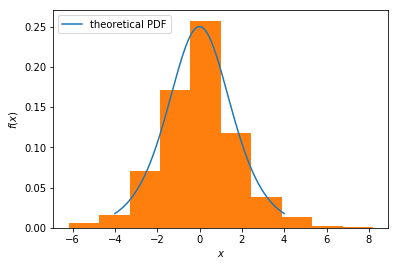

In [128]:
x = np.linspace(-4,4,1000)
pdf = log.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.hist(sample, density=True)

# 3. Генерируем 1000 выборок, объема n, для каждой из выборок находим выборочное среднее (получаем список размера 1000 с выборочными среднеми для выбоки размера n).


## 3.1 n = 5:

In [90]:
average_1 = list()
for i in range(1000):
    log = sts.logistic()
    sample = log.rvs(5)
    average_1.append(sample.mean())

## Выборочное среднее, построенное по выборке можно приблизить нормальным распределением с соответствующими параметрами: $\overline X_n \approx N(EX, DX/n) $

## Построим гистограмму выборочныx средних для выборки размера n = 5 и нормальное распределение для данного среднего:

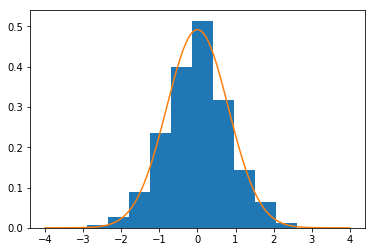

In [124]:
norm_rv = sts.norm(0, (math.pi**2/15)**0.5)
x = np.linspace(-4,4,1000)
plt.hist(average_1, density=True)
sample = norm_rv.rvs(1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

## 3.2 n = 10:

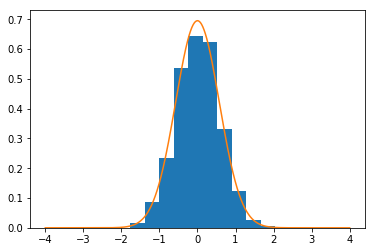

In [123]:
average_2 = list()
for i in range(1000):
    log = sts.logistic()
    sample = log.rvs(10)
    average_2.append(sample.mean())
norm_rv = sts.norm(0, ((math.pi**2)/30)**(0.5))
x = np.linspace(-4,4,1000)
plt.hist(average_2, density=True)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')


## 3.3 n = 50:

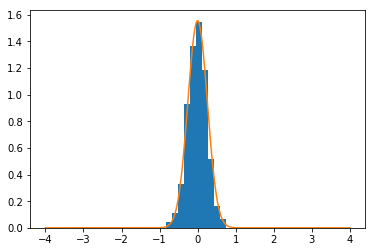

In [122]:
average_3 = list()
for i in range(1000):
    log = sts.logistic()
    sample = log.rvs(50)
    average_3.append(sample.mean())
norm_rv = sts.norm(0, (math.pi)/150**0.5)
x = np.linspace(-4,4,1000)
plt.hist(average_3, density=True)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

## 3.4 n = 1000:

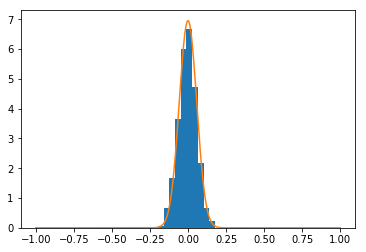

In [127]:
average_4 = list()
for i in range(1000):
    log = sts.logistic()
    sample = log.rvs(1000)
    average_4.append(sample.mean())
norm_rv = sts.norm(0, ((math.pi**2)/3000)**0.5)
x = np.linspace(-1,1,1000)
plt.hist(average_4, density=True)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

# 4. Вывод:
## На основании построенных гистограмм для выборочных средних для выборок из логистического распределения разных объемов, можем сделать вывод: чем больше объем выборки, тем больше гистограмма для выборочных средних напоминает нормальное распределение. Это ясно даже из формулы дисперсии для соответствубщего нормального распределения: $D\overline{X}^n = DX/n.$ То есть чем больше n, тем меньше разброс.